# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (help adhere to good coding practices)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)

<IPython.core.display.Javascript object>

In [3]:
df_main = pd.read_csv("INNHotelsGroup.csv")

<IPython.core.display.Javascript object>

In [4]:
# copying data to another variable to avoid any changes to original data
data = df_main.copy()

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [5]:
data.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

<IPython.core.display.Javascript object>

In [6]:
data.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270           167.80000                       1   Not_Canceled  
36271            90.95000                       2       Canceled  
36272            98.39000                       2   Not_Canceled  
36273            94.50000                       0       Canceled  
36274           161.67000                       0   Not_Canceled

<IPython.core.display.Javascript object>

In [8]:
data.shape

(36275, 19)

<IPython.core.display.Javascript object>

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

<IPython.core.display.Javascript object>

In [10]:
# checking for null values
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<IPython.core.display.Javascript object>

In [11]:
# checking for duplicate values
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [16]:
data.Booking_ID.nunique()

36275

<IPython.core.display.Javascript object>

Dropping columns with all unique values.

In [19]:
data = data.drop(["Booking_ID"], axis=1)

<IPython.core.display.Javascript object>

In [20]:
data.describe().T

count       mean      std  \
no_of_adults                         36275.00000    1.84496  0.51871   
no_of_children                       36275.00000    0.10528  0.40265   
no_of_weekend_nights                 36275.00000    0.81072  0.87064   
no_of_week_nights                    36275.00000    2.20430  1.41090   
required_car_parking_space           36275.00000    0.03099  0.17328   
lead_time                            36275.00000   85.23256 85.93082   
arrival_year                         36275.00000 2017.82043  0.38384   
arrival_month                        36275.00000    7.42365  3.06989   
arrival_date                         36275.00000   15.59700  8.74045   
repeated_guest                       36275.00000    0.02564  0.15805   
no_of_previous_cancellations         36275.00000    0.02335  0.36833   
no_of_previous_bookings_not_canceled 36275.00000    0.15341  1.75417   
avg_price_per_room                   36275.00000  103.42354 35.08942   
no_of_special_requests               36275.00000    0.61966  0.78624   

                                            min        25%        50%  \
no_of_adults                            0.00000    2.00000    2.00000   
no_of_children                          0.00000    0.00000    0.00000   
no_of_weekend_nights                    0.00000    0.00000    1.00000   
no_of_week_nights                       0.00000    1.00000    2.00000   
required_car_parking_space              0.00000    0.00000    0.00000   
lead_time                               0.00000   17.00000   57.00000   
arrival_year                         2017.00000 2018.00000 2018.00000   
arrival_month                           1.00000    5.00000    8.00000   
arrival_date                            1.00000    8.00000   16.00000   
repeated_guest                          0.00000    0.00000    0.00000   
no_of_previous_cancellations            0.00000    0.00000    0.00000   
no_of_previous_bookings_not_canceled    0.00000    0.00000    0.00000   
avg_price_per_room                      0.00000   80.30000   99.45000   
no_of_special_requests                  0.00000    0.00000    0.00000   

                                            75%        max  
no_of_adults                            2.00000    4.00000  
no_of_children                          0.00000   10.00000  
no_of_weekend_nights                    2.00000    7.00000  
no_of_week_nights                       3.00000   17.00000  
required_car_parking_space              0.00000    1.00000  
lead_time                             126.00000  443.00000  
arrival_year                         2018.00000 2018.00000  
arrival_month                          10.00000   12.00000  
arrival_date                           23.00000   31.00000  
repeated_guest                          0.00000    1.00000  
no_of_previous_cancellations            0.00000   13.00000  
no_of_previous_bookings_not_canceled    0.00000   58.00000  
avg_price_per_room                    120.00000  540.00000  
no_of_special_requests                  1.00000    5.00000

<IPython.core.display.Javascript object>

The data has no null values and has 36,275 rows of data. 

- The number of adult guests ranges from 0 - 4, and children ranges from 0-10.
- The max number of car parking spaces needed is 1.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [25]:
import numpy as np

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins='auto'):
    """
    Boxplot and histogram combined with additional print statements

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default 'auto')
    """

    # Creating subplots for boxplot and histogram
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )

    # Boxplot with mean indicator
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")

    # Histogram with or without KDE and specified bins
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins)

    # Add mean and median lines to the histogram
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--", label="Mean")
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-", label="Median"
    )

    # Additional print statements
    print("Histogram and Boxplot Summary:")
    print("-" * 30)
    print(f"Feature: {feature}")
    print("- Mean of the column: {0:.2f}".format(data[feature].mean()))

    # Checking for outliers (considering values beyond 1.5 times the interquartile range)
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers_present = any(
        (data[feature] < lower_bound) | (data[feature] > upper_bound)
    )
    print(f"- Outliers Present: {'Yes' if outliers_present else 'No'}")

    # Checking distribution skewness
    skewness = data[feature].skew()
    if skewness > 0:
        print("- Distribution: Right Skewed")
    elif skewness < 0:
        print("- Distribution: Left Skewed")
    else:
        print("- Distribution: Normal")

    # Set integer bins and labels for x-axis ticks
    if bins == 'auto':
        bins = len(np.unique(data[feature]))
        xticks = np.arange(min(data[feature]), max(data[feature]) + 1, 1)
        ax_hist2.set_xticks(xticks)
    
    # Show legend for mean and median lines
    ax_hist2.legend()

    # Show the plot
    plt.show()

# Example usage:
# histogram_boxplot(your_data_frame, 'your_column_name')


<IPython.core.display.Javascript object>

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top and additional print statements

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    # Get the total count of data points
    total = len(data[feature])

    # Determine the number of unique categories in the specified column
    count = data[feature].nunique()

    # Set the figure size based on the number of unique categories
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    # Set the x-axis ticks rotation and font size
    plt.xticks(rotation=90, fontsize=15)

    # Create a count plot with specified order
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    # Annotate each bar with count or percentage
    for p in ax.patches:
        if perc:
            # Calculate and format the percentage of each category
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            # Display the count of each category
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2  # x-coordinate of the bar's center
        y = p.get_height()  # height of the bar

        # Annotate the bar with the count or percentage
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    # Summary Section
    print("Barplot Summary:")
    print("-" * 30)
    print(f"Feature: {feature}")
    print("- Total data points: {}".format(total))

    if perc:
        # Calculate and print the percentage of each category
        for category in data[feature].value_counts().index[:n]:
            category_count = data[feature].value_counts()[category]
            category_percentage = 100 * category_count / total
            print(
                "- {} percentage: {:.1f}%".format(category, category_percentage)
            )

    # Show the plot
    plt.show()

# Example usage:
# labeled_barplot(your_data_frame, 'your_column_name', perc=True, n=5)


<IPython.core.display.Javascript object>

In [30]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

In [31]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

# Univariate Analysis

Barplot Summary:
------------------------------
Feature: required_car_parking_space
- Total data points: 36275
- 0 percentage: 96.9%
- 1 percentage: 3.1%


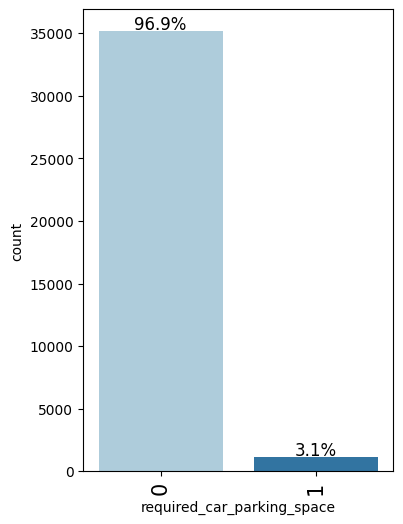

Barplot Summary:
------------------------------
Feature: arrival_year
- Total data points: 36275
- 2018 percentage: 82.0%
- 2017 percentage: 18.0%


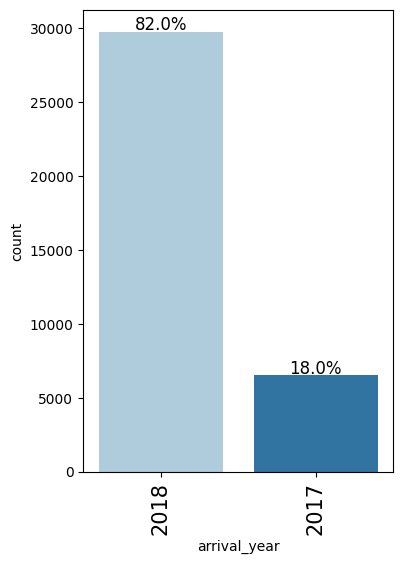

Barplot Summary:
------------------------------
Feature: repeated_guest
- Total data points: 36275
- 0 percentage: 97.4%
- 1 percentage: 2.6%


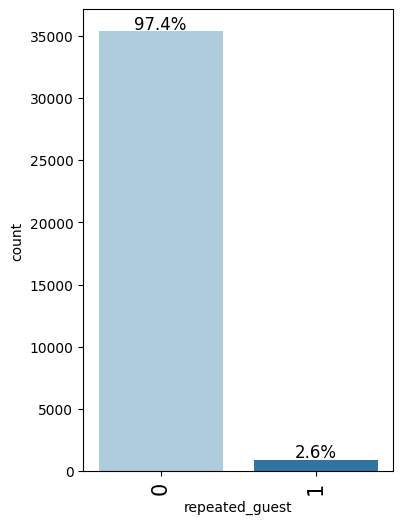

<IPython.core.display.Javascript object>

In [34]:
# Iterate through columns in the DataFrame
for column in data.columns:
    # Check if the dtype of the column is 'int64' and the number of unique values is less than 5
    if data[column].dtype == "int64" and data[column].nunique() < 5:
        # Call the labeled_barplot function with the current column
        labeled_barplot(data, column, perc=True)

Histogram and Boxplot Summary:
------------------------------
Feature: no_of_children
- Mean of the column: 0.11
- Outliers Present: Yes
- Distribution: Right Skewed


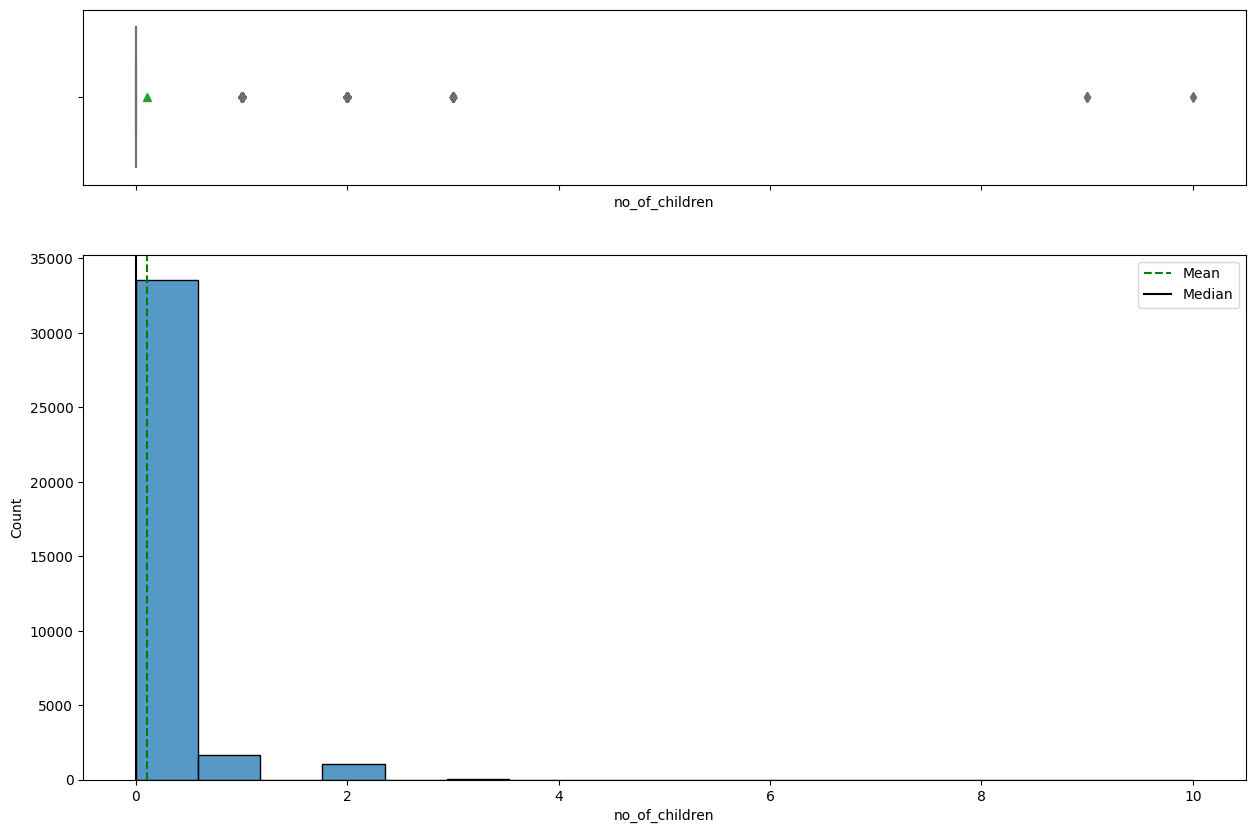

Histogram and Boxplot Summary:
------------------------------
Feature: no_of_weekend_nights
- Mean of the column: 0.81
- Outliers Present: Yes
- Distribution: Right Skewed


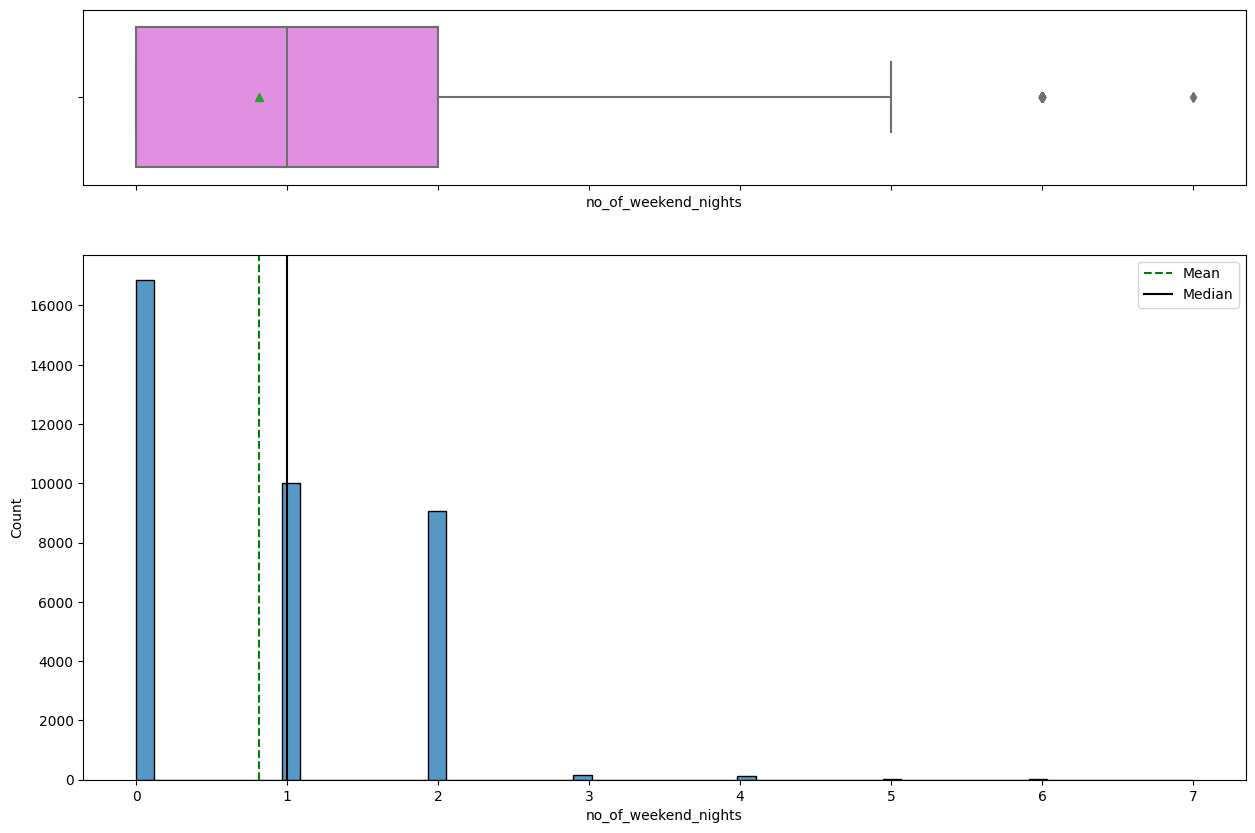

Histogram and Boxplot Summary:
------------------------------
Feature: no_of_week_nights
- Mean of the column: 2.20
- Outliers Present: Yes
- Distribution: Right Skewed


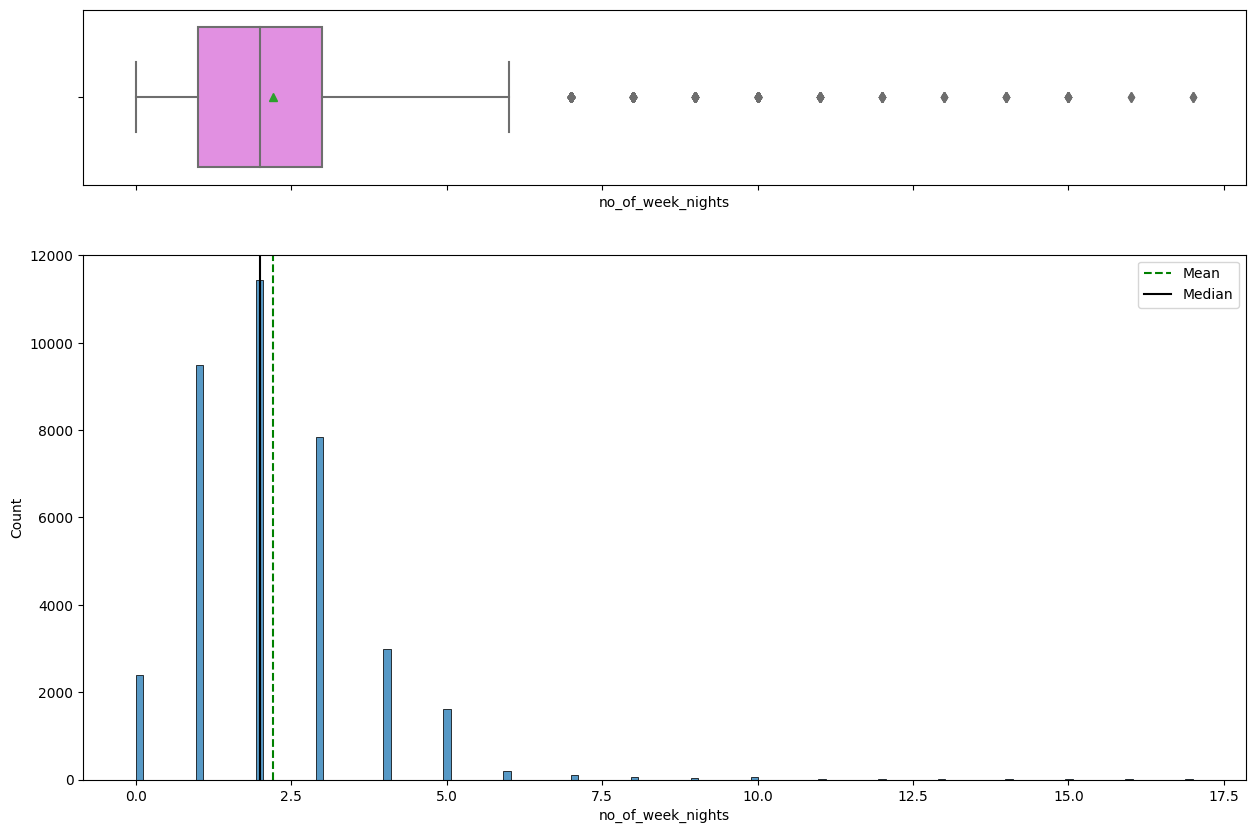

Histogram and Boxplot Summary:
------------------------------
Feature: lead_time
- Mean of the column: 85.23
- Outliers Present: Yes
- Distribution: Right Skewed


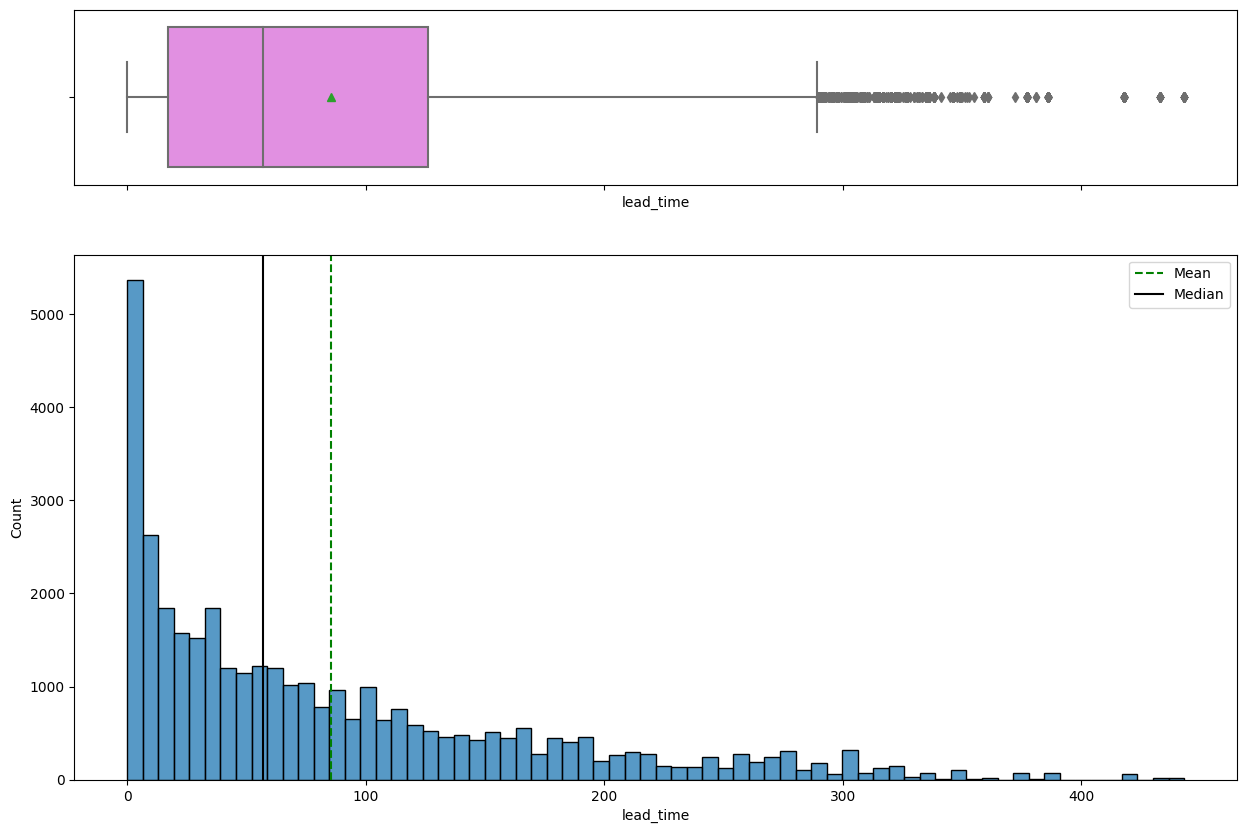

Histogram and Boxplot Summary:
------------------------------
Feature: arrival_month
- Mean of the column: 7.42
- Outliers Present: No
- Distribution: Left Skewed


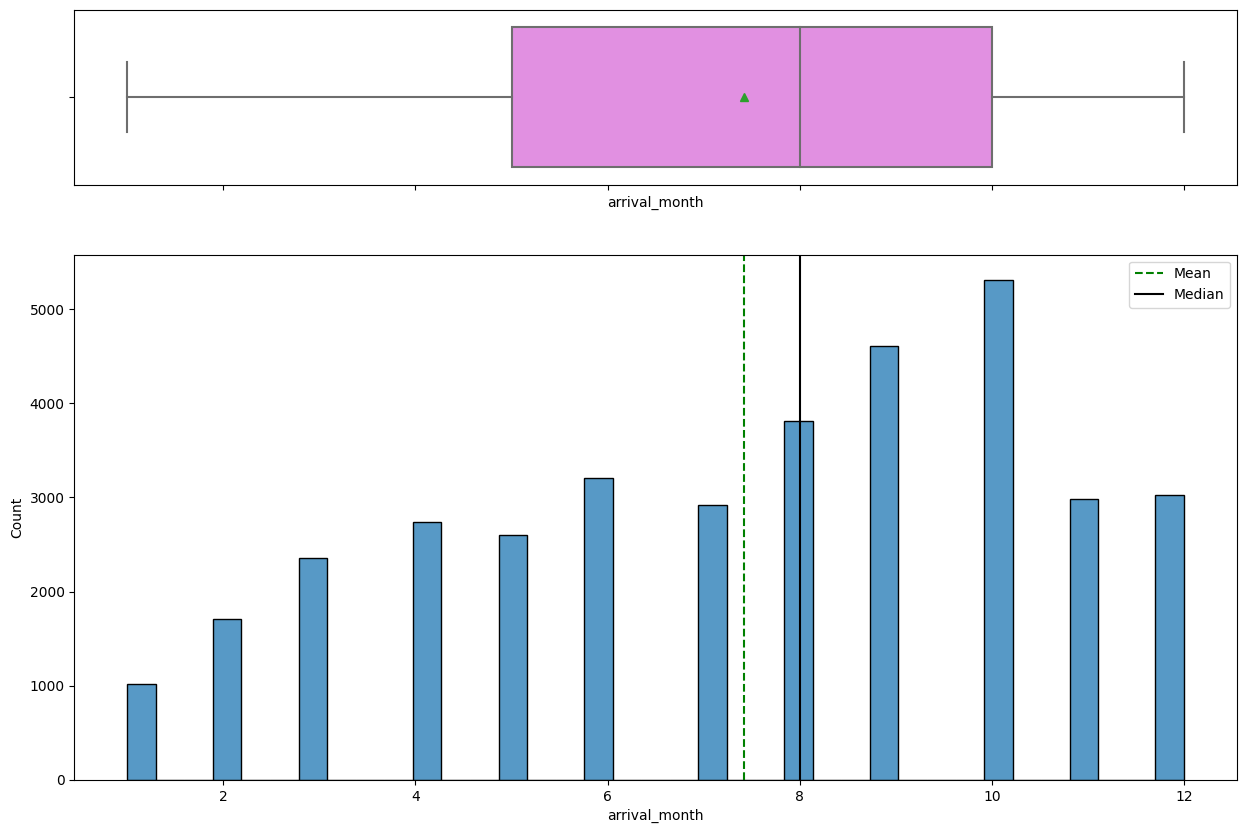

Histogram and Boxplot Summary:
------------------------------
Feature: arrival_date
- Mean of the column: 15.60
- Outliers Present: No
- Distribution: Right Skewed


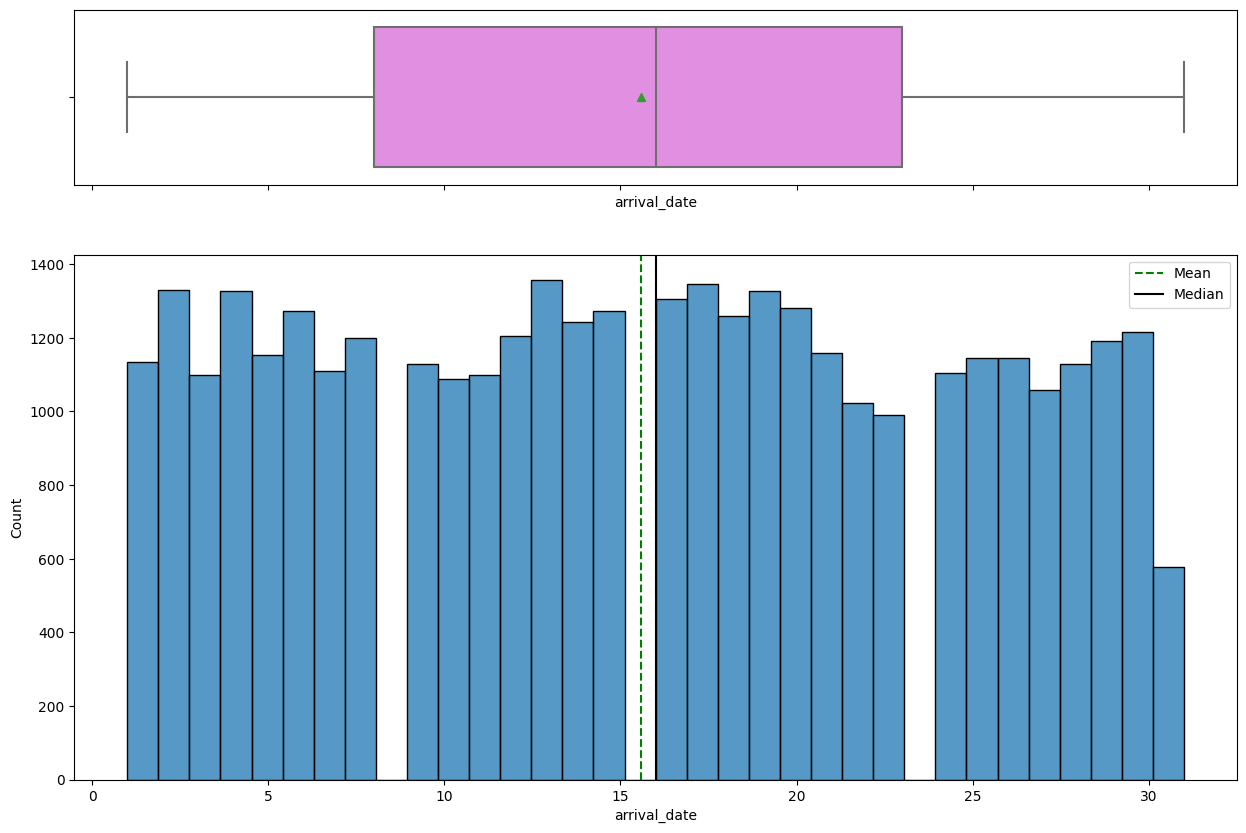

Histogram and Boxplot Summary:
------------------------------
Feature: no_of_previous_cancellations
- Mean of the column: 0.02
- Outliers Present: Yes
- Distribution: Right Skewed


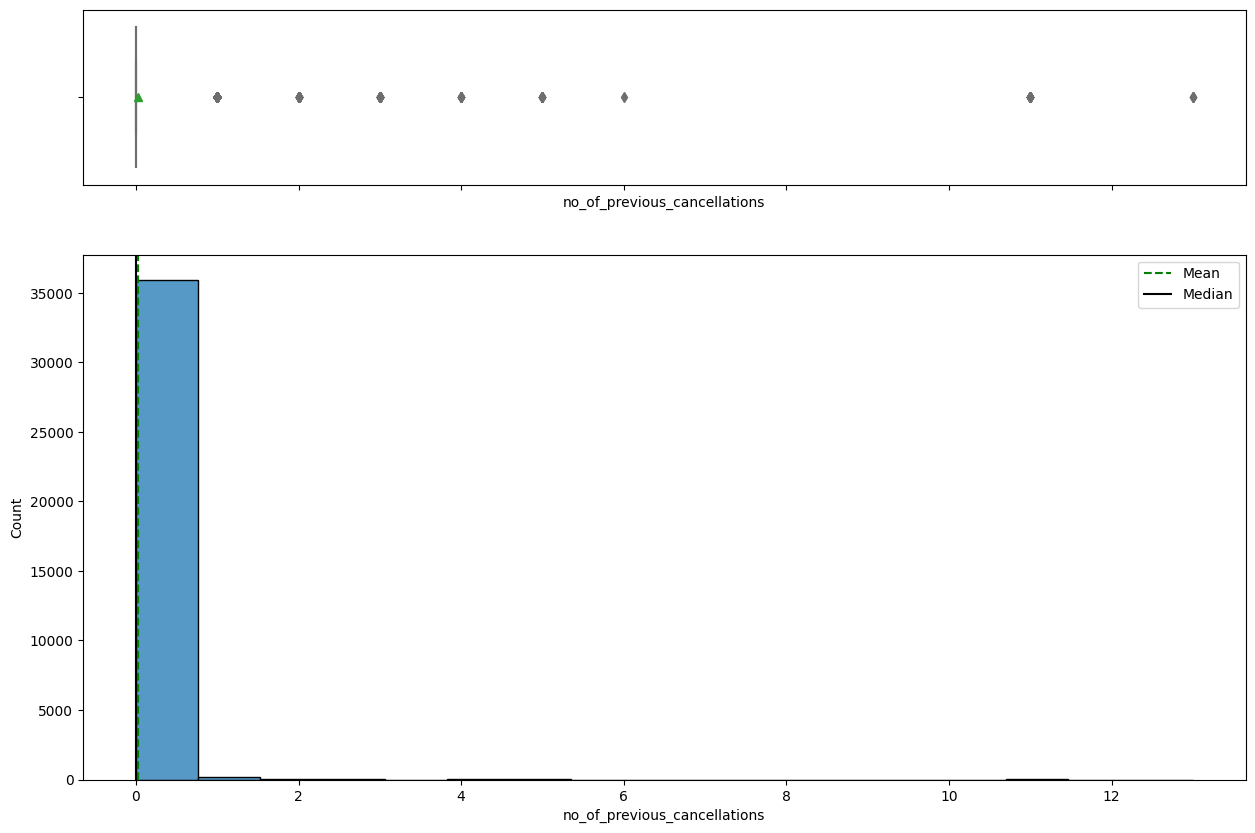

Histogram and Boxplot Summary:
------------------------------
Feature: no_of_previous_bookings_not_canceled
- Mean of the column: 0.15
- Outliers Present: Yes
- Distribution: Right Skewed


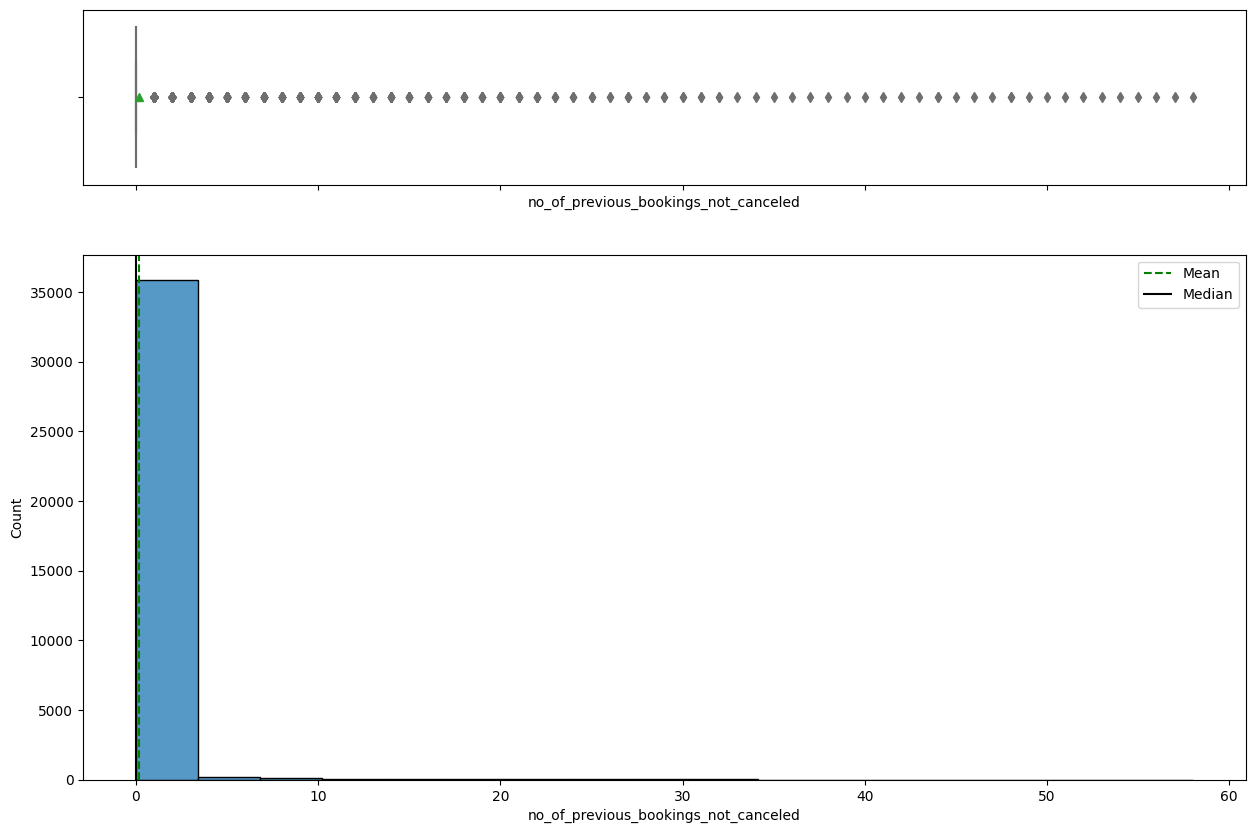

Histogram and Boxplot Summary:
------------------------------
Feature: no_of_special_requests
- Mean of the column: 0.62
- Outliers Present: Yes
- Distribution: Right Skewed


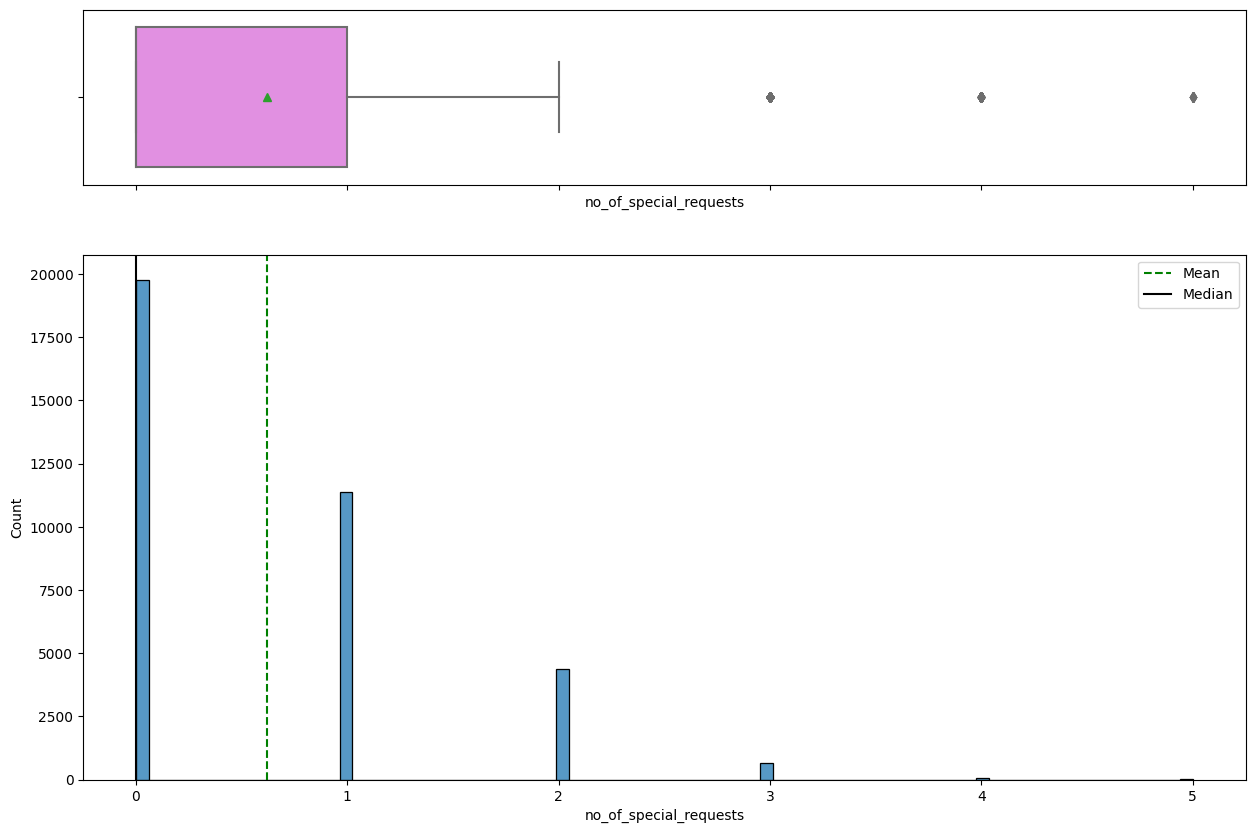

<IPython.core.display.Javascript object>

In [36]:
# Iterate through columns in the DataFrame
for column in data.columns:
    # Check if the dtype of the column is 'int64' and the number of unique values is greater than 5
    if data[column].dtype == "int64" and data[column].nunique() > 5:
        # Call the histogram_boxplot function with the current column
        histogram_boxplot(data, column)

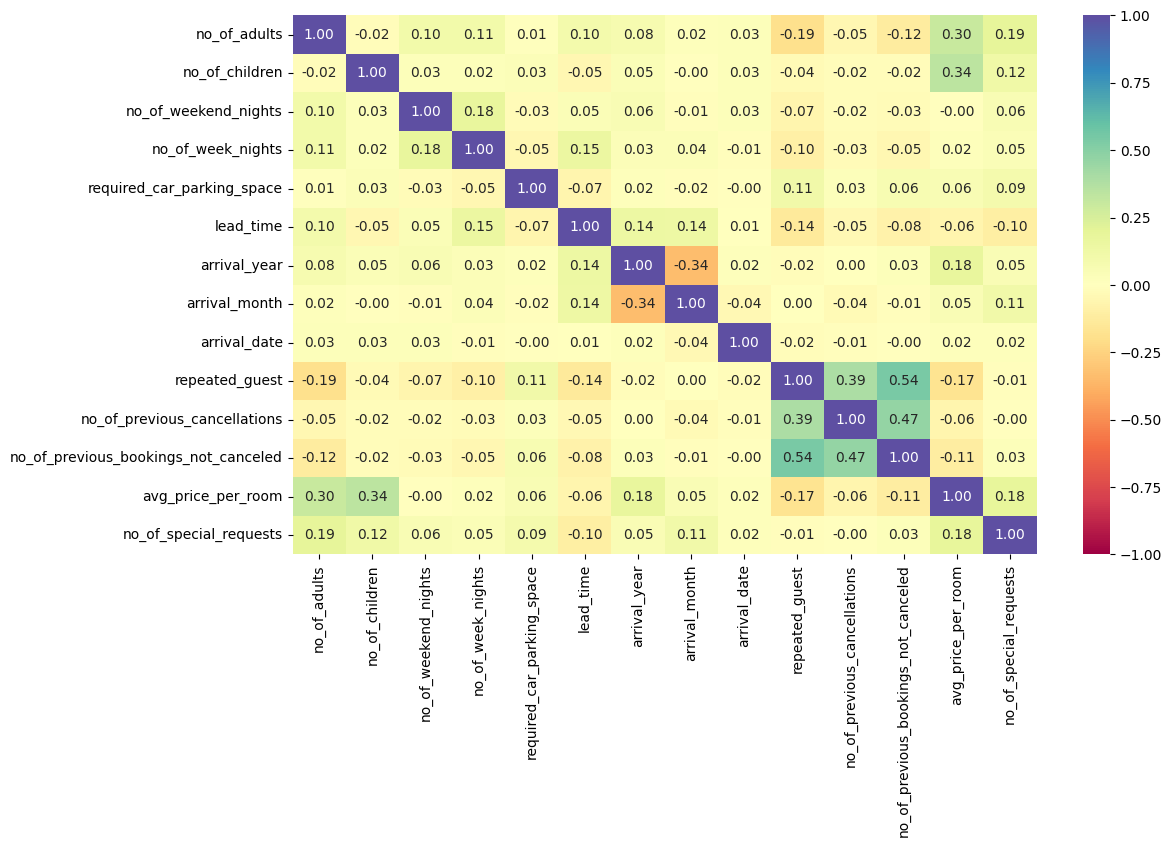

<IPython.core.display.Javascript object>

In [38]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Leading Questions**:
1. What are the busiest months in the hotel?
    
    October, september, and august are the busiest months.
    
2. Which market segment do most of the guests come from?

    Online is the biggest market segment.
    
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

    Online market segment has the highest average room price followed by Aviation.
    
4. What percentage of bookings are canceled? 

    32.76% cancelled.
    
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

    Repeating Guest cancellation is 1.7%.
    
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

    Those with Special requirements have a 20% cancellation rate, which is lower than the standard 32%, so it could be argued that these guests are less likely to cancel.

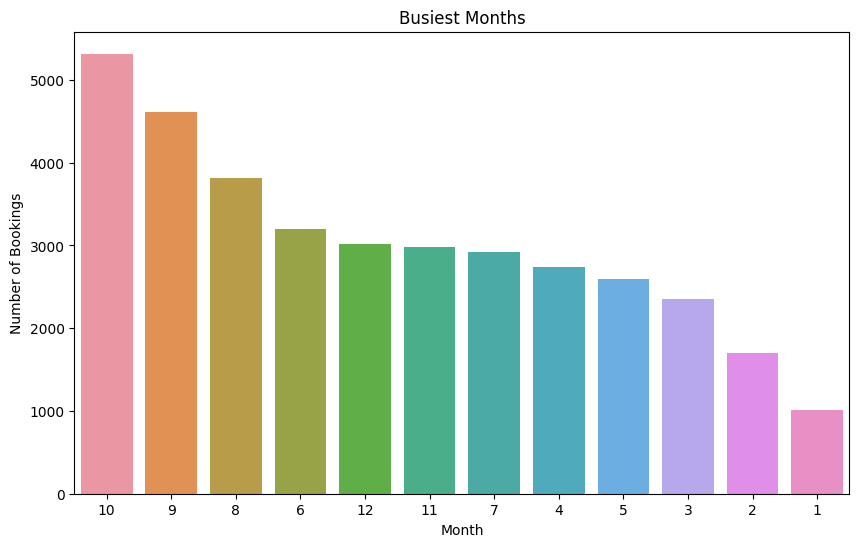

Busiest Months:
arrival_month
10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
dtype: int64


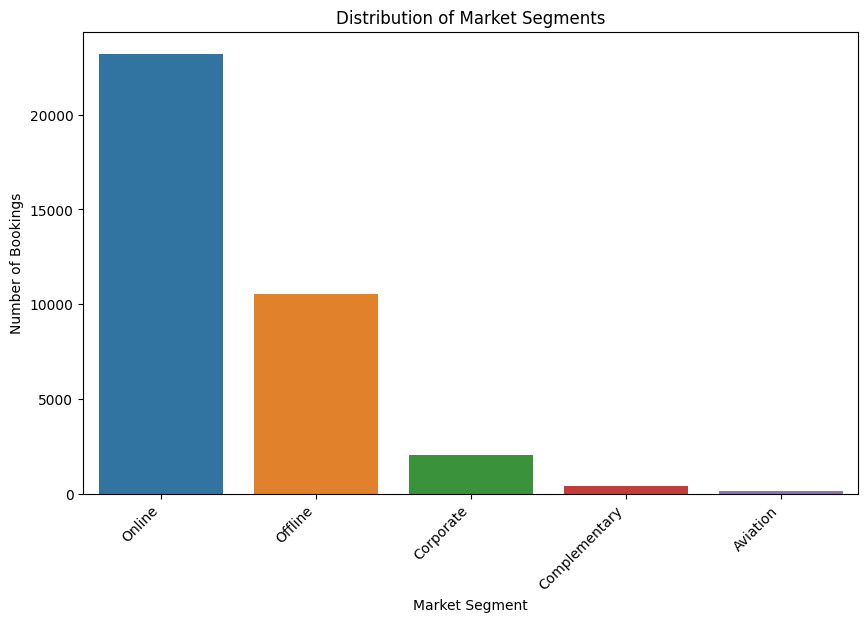

Most Common Market Segment: Online
Average Room Prices by Market Segment:
market_segment_type
Aviation        100.70400
Complementary     3.14176
Corporate        82.91174
Offline          91.63268
Online          112.25685
Name: avg_price_per_room, dtype: float64


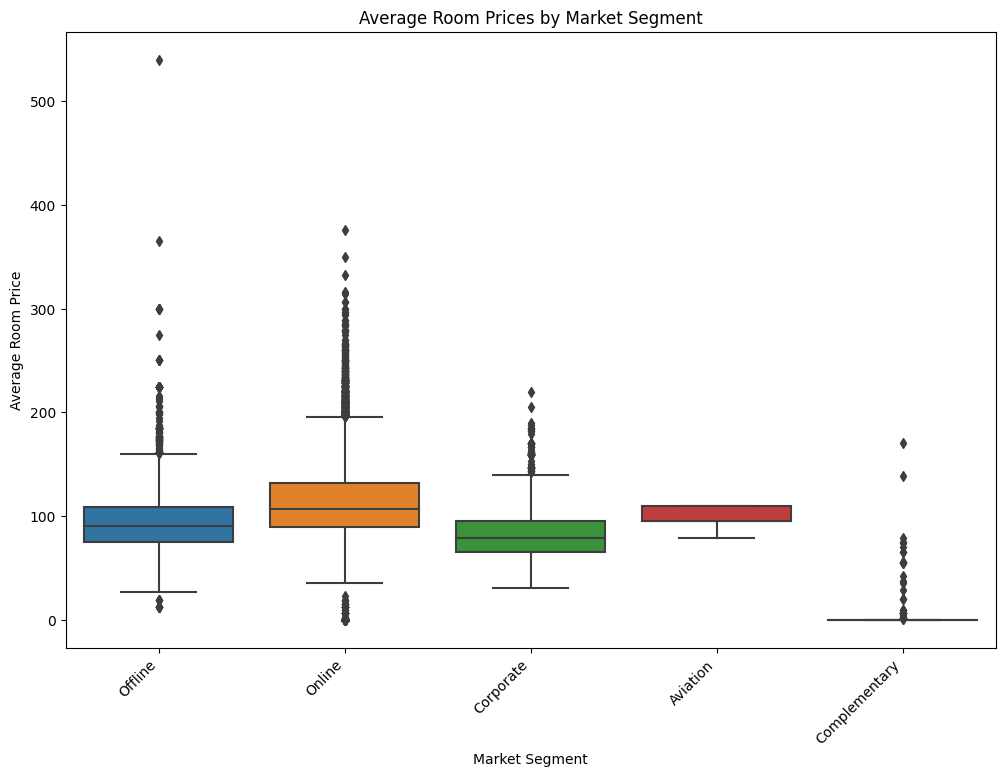

Cancellation Percentage: 32.76%
Cancellation Percentage for Repeating Guests: 1.72%
Cancellation Percentage for Bookings with Special Requests: 20.24%


<IPython.core.display.Javascript object>

In [56]:
# Convert 'booking_status' to a binary indicator (1 for Canceled, 0 for Not Canceled)
data["booking_status_indicator"] = data["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

# Bar chart for busiest months
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="arrival_month", order=busiest_months.index)
plt.title("Busiest Months")
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.show()


# What are the busiest months in the hotel?
busiest_months = data.groupby("arrival_month").size().sort_values(ascending=False)
print("Busiest Months:")
print(busiest_months)

# Bar chart for market segment distribution
plt.figure(figsize=(10, 6))
sns.countplot(
    data=data,
    x="market_segment_type",
    order=data["market_segment_type"].value_counts().index,
)
plt.title("Distribution of Market Segments")
plt.xlabel("Market Segment")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45, ha="right")  # Adjust rotation for better readability
plt.show()


# Which market segment do most of the guests come from?
most_common_market_segment = data["market_segment_type"].value_counts().idxmax()
print("Most Common Market Segment:", most_common_market_segment)

# What are the differences in room prices in different market segments?
room_prices_by_segment = data.groupby("market_segment_type")[
    "avg_price_per_room"
].mean()
print("Average Room Prices by Market Segment:")
print(room_prices_by_segment)

# Boxplot for average room prices by market segment
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x="market_segment_type", y="avg_price_per_room")
plt.title("Average Room Prices by Market Segment")
plt.xlabel("Market Segment")
plt.ylabel("Average Room Price")
plt.xticks(rotation=45, ha="right")  # Adjust rotation for better readability
plt.show()

# What percentage of bookings are canceled?
cancellation_percentage = (data["booking_status_indicator"].sum() / len(data)) * 100
print("Cancellation Percentage: {:.2f}%".format(cancellation_percentage))

# What percentage of repeating guests cancel?
repeating_guests_cancellation_percentage = (
    data[data["repeated_guest"] == 1]["booking_status_indicator"].sum()
    / len(data[data["repeated_guest"] == 1])
) * 100
print(
    "Cancellation Percentage for Repeating Guests: {:.2f}%".format(
        repeating_guests_cancellation_percentage
    )
)

# Do special requirements affect booking cancellation?
special_requests_cancellation_percentage = (
    data[data["no_of_special_requests"] > 0]["booking_status_indicator"].sum()
    / len(data[data["no_of_special_requests"] > 0])
) * 100
print(
    "Cancellation Percentage for Bookings with Special Requests: {:.2f}%".format(
        special_requests_cancellation_percentage
    )
)

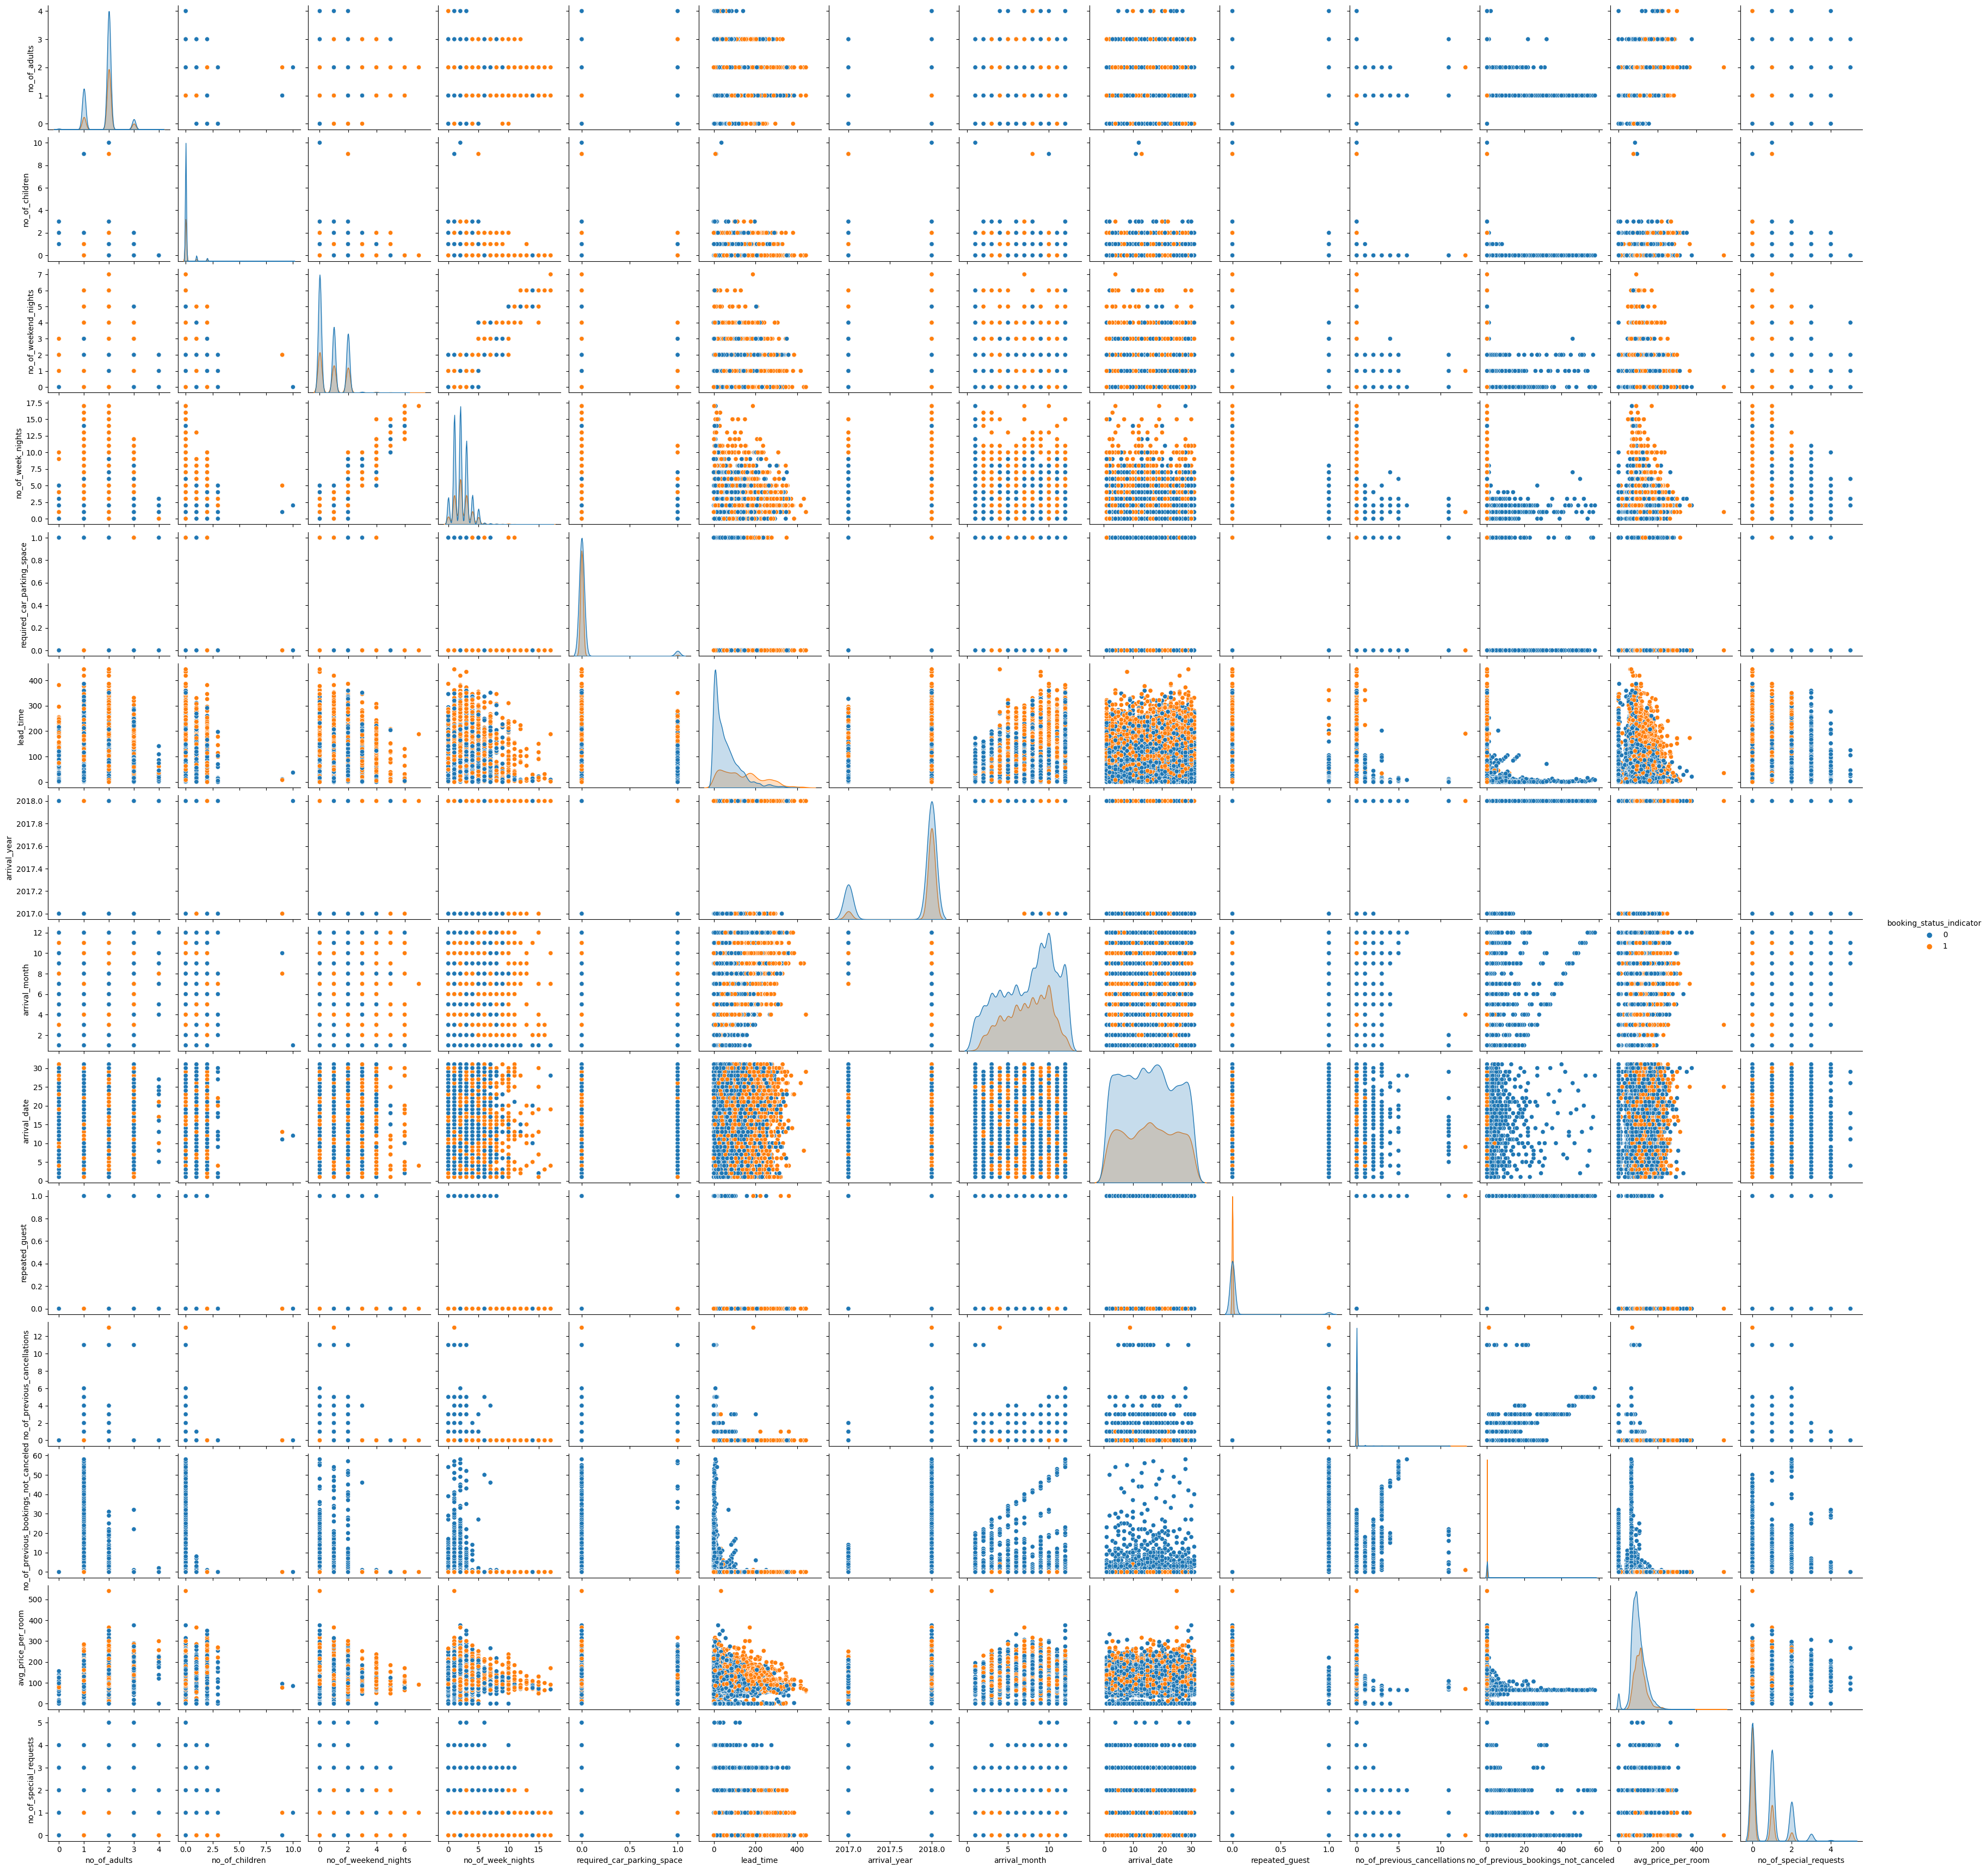

<IPython.core.display.Javascript object>

In [120]:
sns.pairplot(data, hue="booking_status_indicator")

The biggest correlator here appears to be high lead time with average price per room in terms of cancellations.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

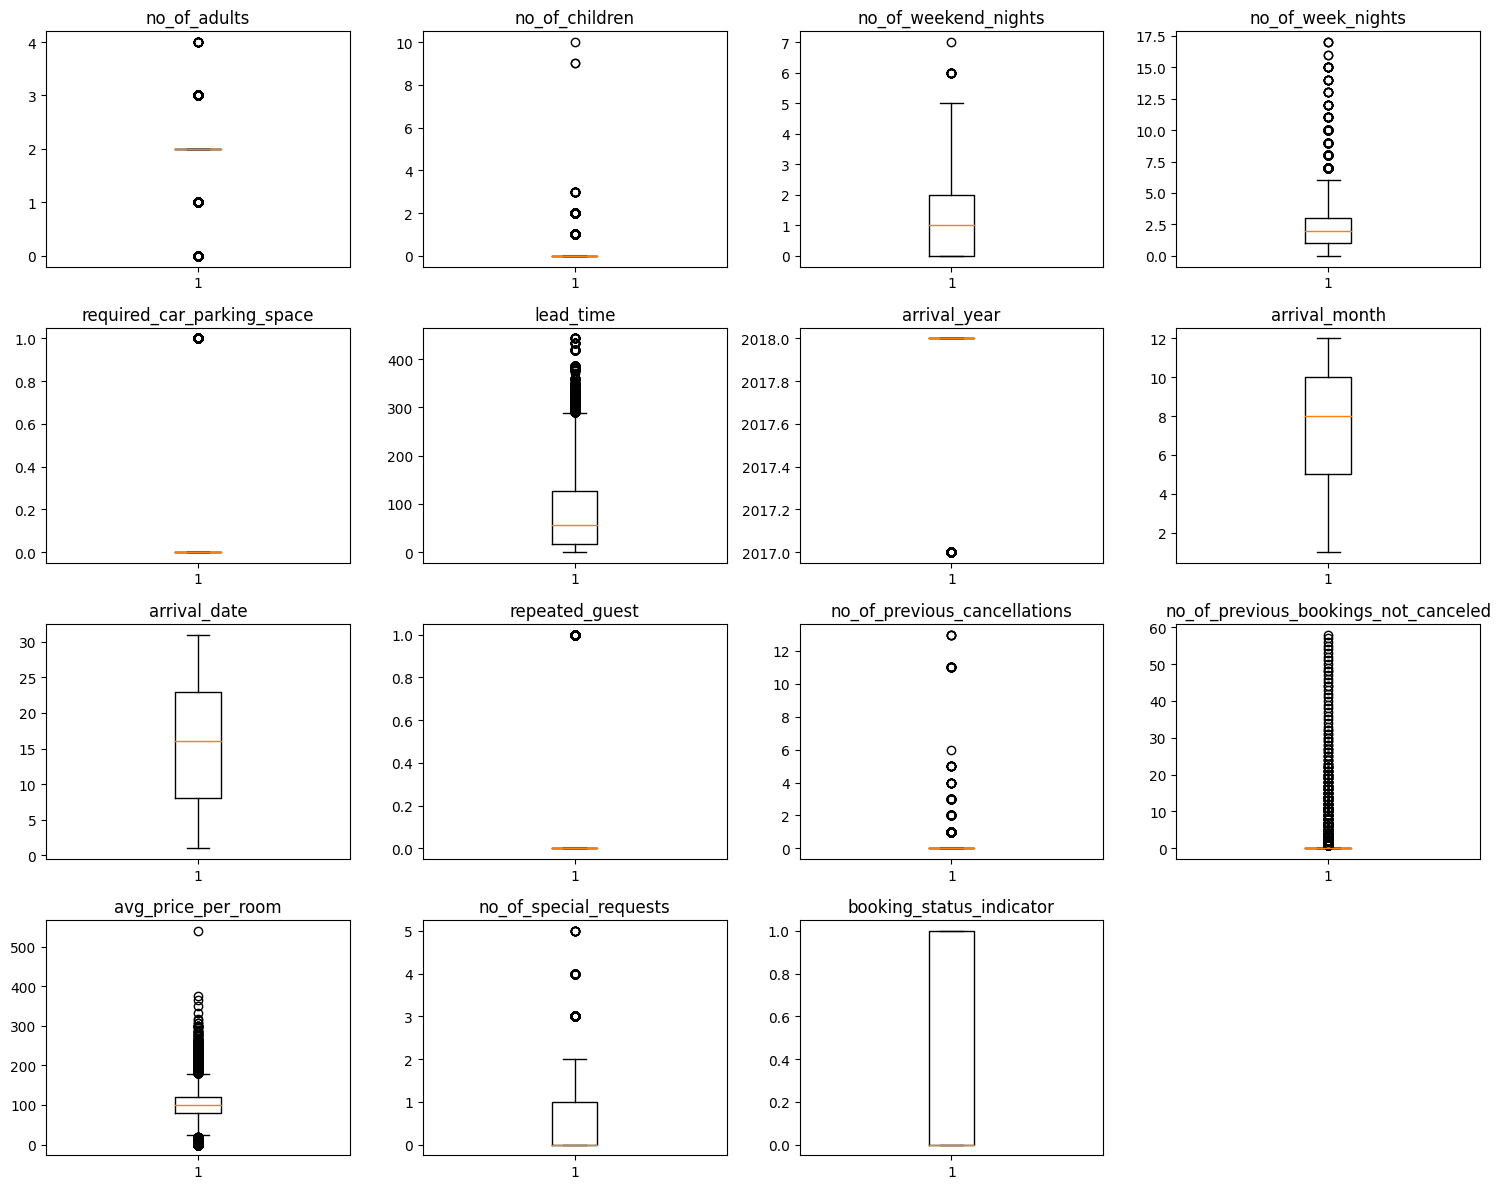

<IPython.core.display.Javascript object>

In [59]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

There are outliers but we will not treat them as they are proper values.

In [60]:
data = data.drop(["booking_status"], axis=1)
X = data.drop(["booking_status_indicator"], axis=1)
Y = data["booking_status_indicator"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [61]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status_indicator, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status_indicator, dtype: float64


<IPython.core.display.Javascript object>

The rate of cancellation was around 32.7% and this remains in our training and testing data sets.

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [123]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Select only numeric columns
numeric_columns = data.select_dtypes(include=["float64", "int64"]).columns

# Add a constant term to the numeric predictors for VIF calculation
X = add_constant(data[numeric_columns])

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print("VIF values:")
print(vif_data)

VIF values:
                                Variable            VIF
0                                  const 35303015.73364
1                           no_of_adults        1.20612
2                         no_of_children        1.16437
3                   no_of_weekend_nights        1.05475
4                      no_of_week_nights        1.07003
5             required_car_parking_space        1.03312
6                              lead_time        1.39068
7                           arrival_year        1.27739
8                          arrival_month        1.24021
9                           arrival_date        1.00484
10                        repeated_guest        1.55629
11          no_of_previous_cancellations        1.33318
12  no_of_previous_bookings_not_canceled        1.59590
13                    avg_price_per_room        1.42986
14                no_of_special_requests        1.21078
15              booking_status_indicator        1.42300


<IPython.core.display.Javascript object>

Overall, the VIF values besides the constant are around or below 1.5, which is acceptable. This means that multicollinarity is not a major concern.

## Building a Logistic Regression model

In [70]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [67]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [68]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Model performance evaluation

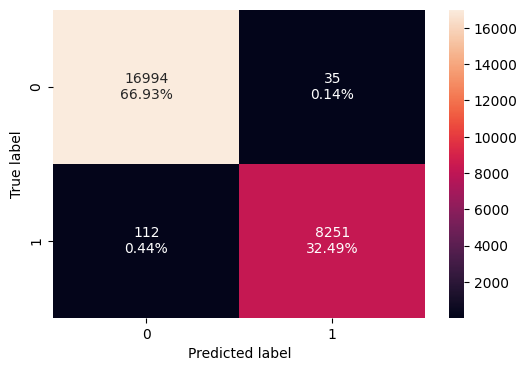

<IPython.core.display.Javascript object>

In [71]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [72]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_perf_train_without

Accuracy  Recall  Precision      F1
0   0.99421 0.98661    0.99578 0.99117

<IPython.core.display.Javascript object>

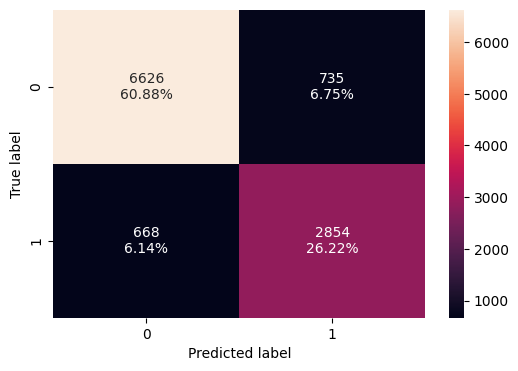

<IPython.core.display.Javascript object>

In [73]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [74]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_perf_test_without

Accuracy  Recall  Precision      F1
0   0.87108 0.81034    0.79521 0.80270

<IPython.core.display.Javascript object>

In [75]:
model = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

<IPython.core.display.Javascript object>

## Final Model Summary

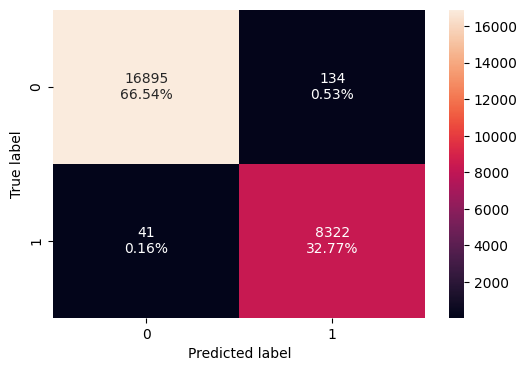

<IPython.core.display.Javascript object>

In [76]:
confusion_matrix_sklearn(model, X_train, y_train)

In [77]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision      F1
0   0.99311 0.99510    0.98415 0.98960

<IPython.core.display.Javascript object>

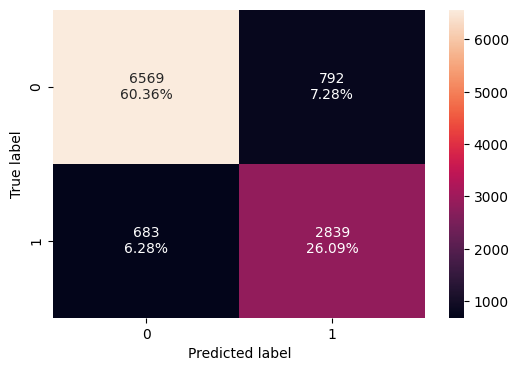

<IPython.core.display.Javascript object>

In [78]:
confusion_matrix_sklearn(model, X_test, y_test)

In [79]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

Accuracy  Recall  Precision      F1
0   0.86447 0.80608    0.78188 0.79379

<IPython.core.display.Javascript object>

There is a large disparity between the performance of the model on the traiing vs test set, so this is overfitting.

## Building a Decision Tree model

In [90]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

<IPython.core.display.Javascript object>

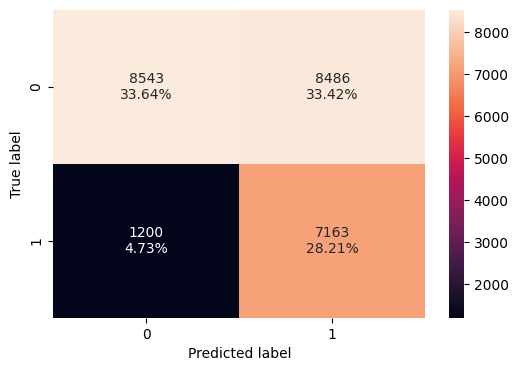

<IPython.core.display.Javascript object>

In [91]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [92]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy  Recall  Precision      F1
0   0.61854 0.85651    0.45773 0.59662

<IPython.core.display.Javascript object>

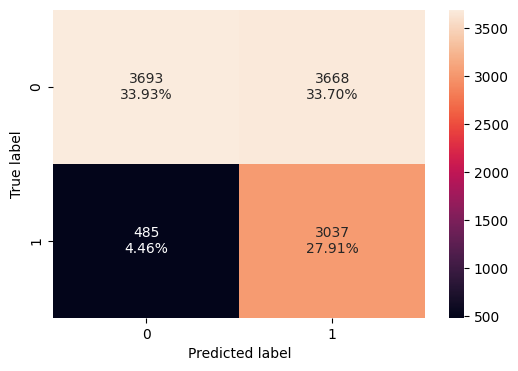

<IPython.core.display.Javascript object>

In [93]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [94]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

Accuracy  Recall  Precision      F1
0   0.61840 0.86229    0.45295 0.59392

<IPython.core.display.Javascript object>

The model is giving a generalized result now since the recall scores on both the train and test data are coming to be around 0.96 which shows that the model is able to generalize well on unseen data.

In [95]:
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

<IPython.core.display.Javascript object>

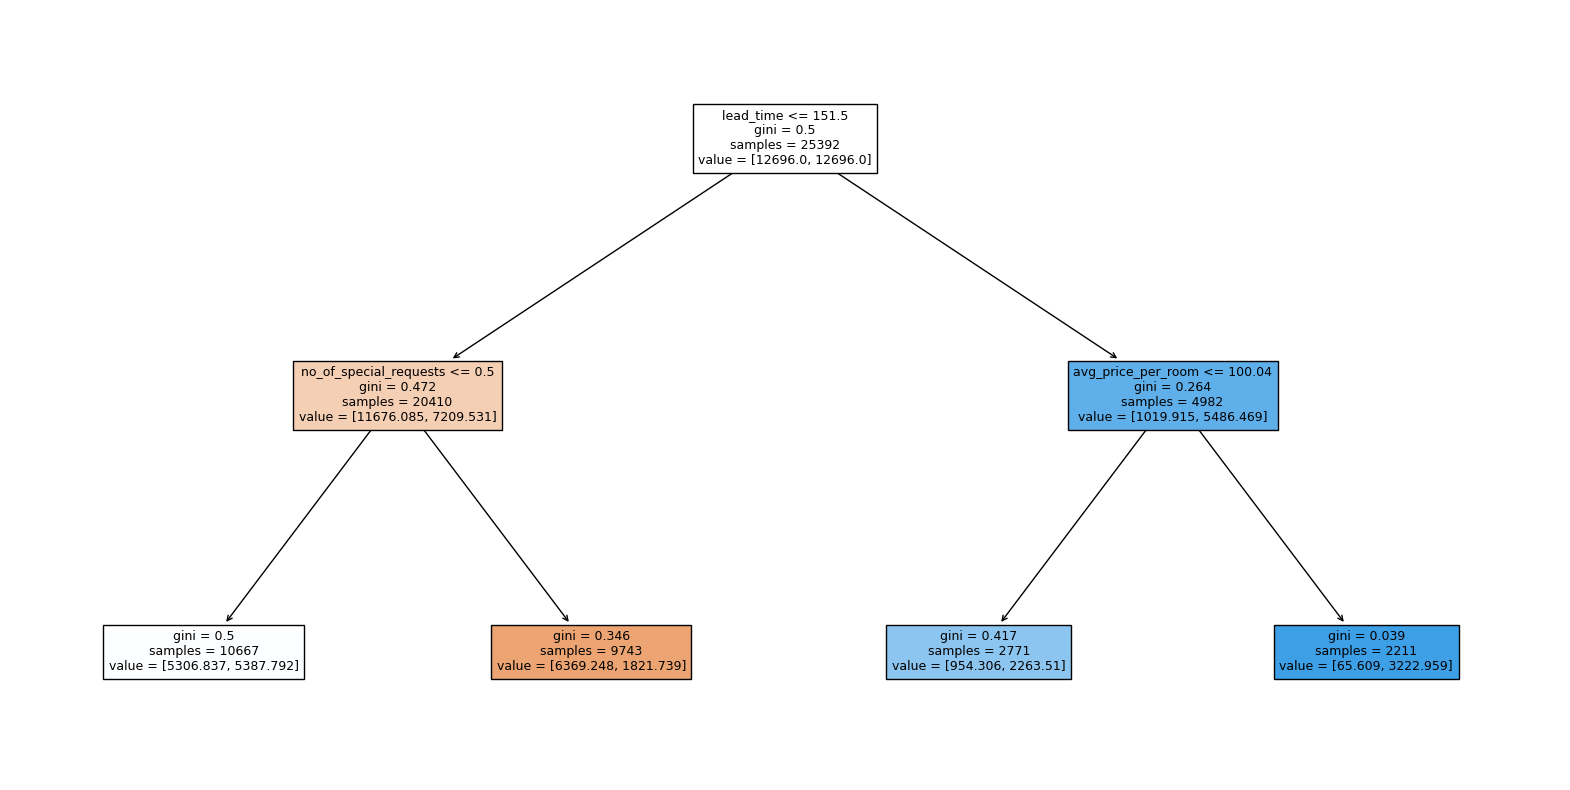

<IPython.core.display.Javascript object>

In [96]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [97]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- weights: [5306.84, 5387.79] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- weights: [6369.25, 1821.74] class: 0
|--- lead_time >  151.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- weights: [954.31, 2263.51] class: 1
|   |--- avg_price_per_room >  100.04
|   |   |--- weights: [65.61, 3222.96] class: 1



<IPython.core.display.Javascript object>

In [98]:
importances = estimator.feature_importances_
importances

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.67701797, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.08174876, 0.24123327, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

<IPython.core.display.Javascript object>

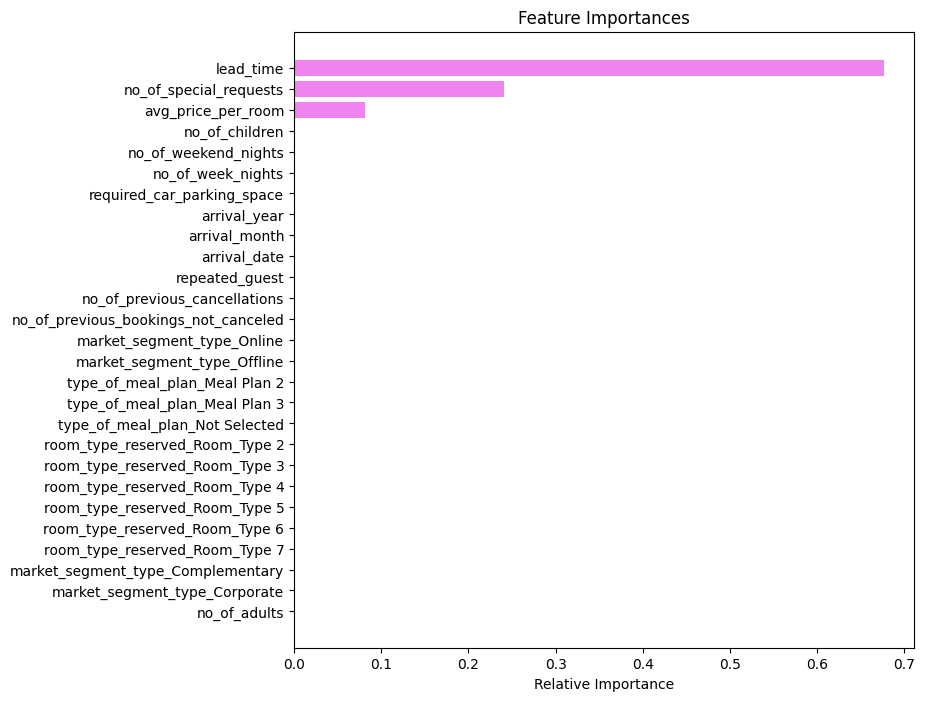

<IPython.core.display.Javascript object>

In [89]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [99]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

<IPython.core.display.Javascript object>

In [100]:
pd.DataFrame(path)

ccp_alphas  impurities
0        0.00000     0.00838
1       -0.00000     0.00838
2        0.00000     0.00838
3        0.00000     0.00838
4        0.00000     0.00838
...          ...         ...
1837     0.00890     0.32806
1838     0.00980     0.33786
1839     0.01272     0.35058
1840     0.03412     0.41882
1841     0.08118     0.50000

[1842 rows x 2 columns]

<IPython.core.display.Javascript object>

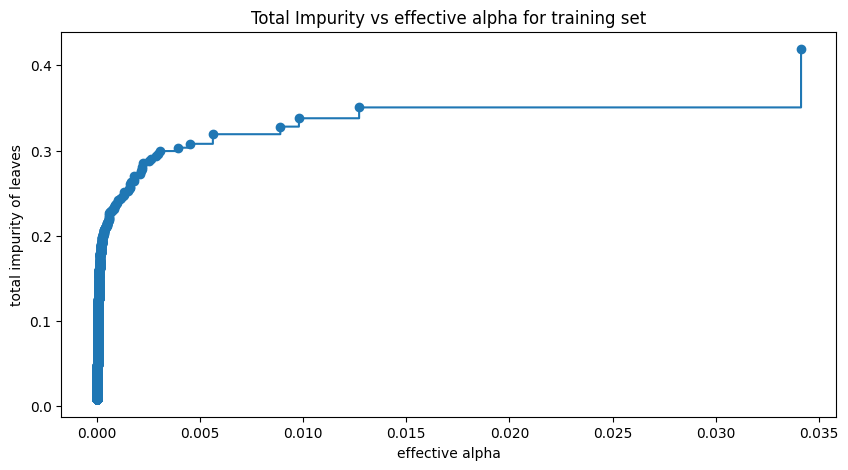

<IPython.core.display.Javascript object>

In [101]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [102]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136943


<IPython.core.display.Javascript object>

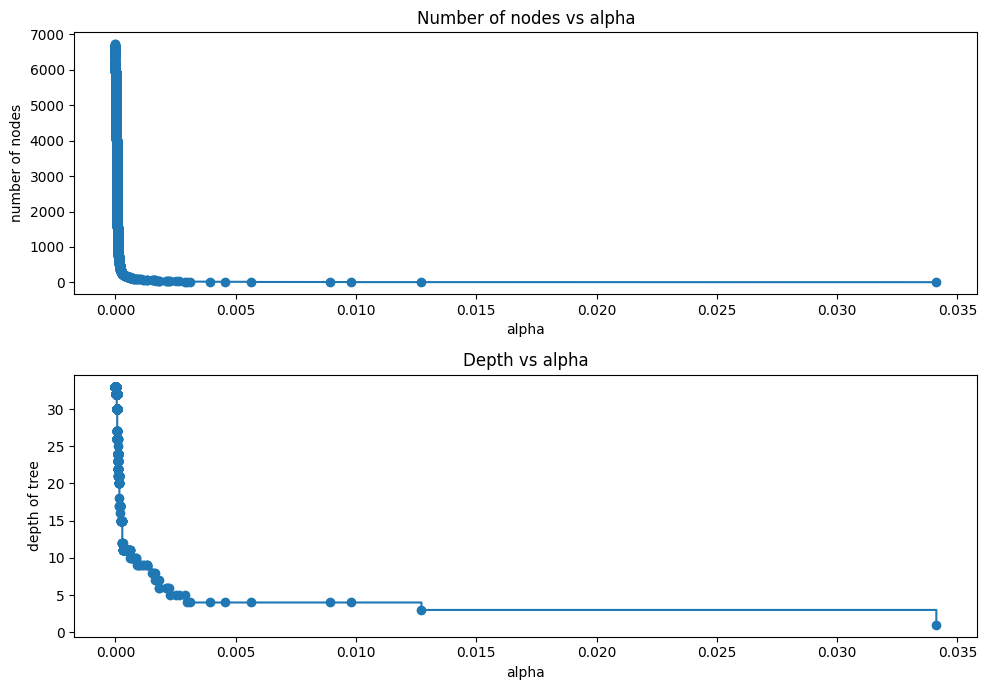

<IPython.core.display.Javascript object>

In [103]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [104]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [105]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

In [106]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

<IPython.core.display.Javascript object>

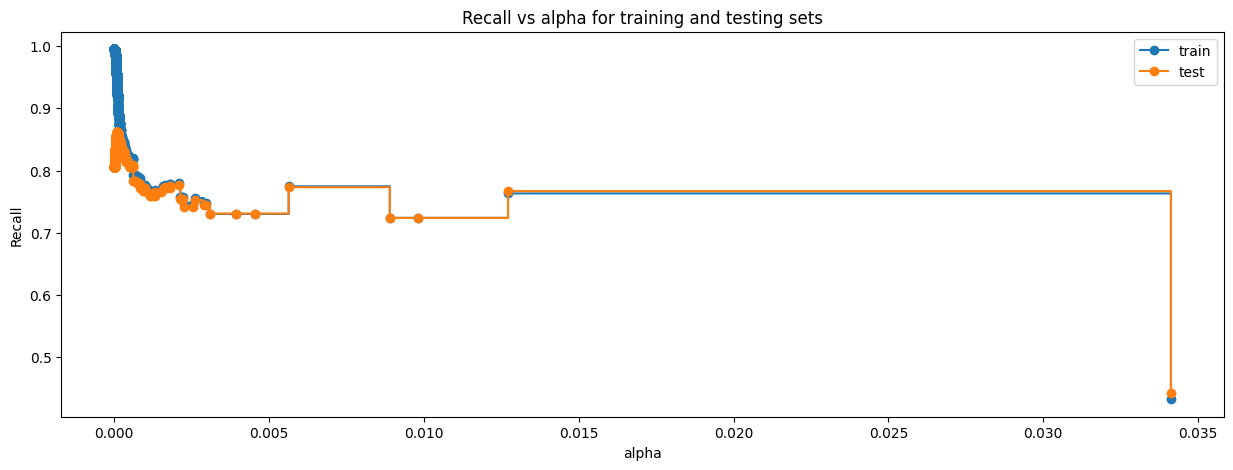

<IPython.core.display.Javascript object>

In [107]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas,
    recall_train,
    marker="o",
    label="train",
    drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [108]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=8.046650001478856e-05, class_weight='balanced',
                       random_state=1)


<IPython.core.display.Javascript object>

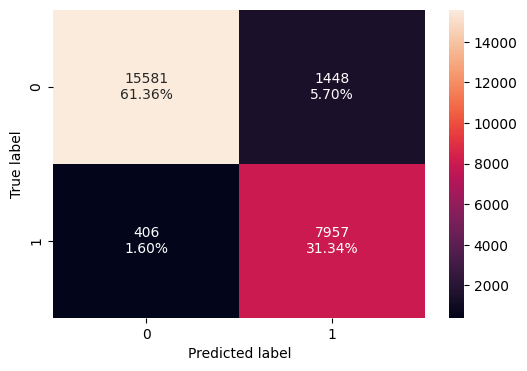

<IPython.core.display.Javascript object>

In [109]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [110]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

Accuracy  Recall  Precision      F1
0   0.92698 0.95145    0.84604 0.89566

<IPython.core.display.Javascript object>

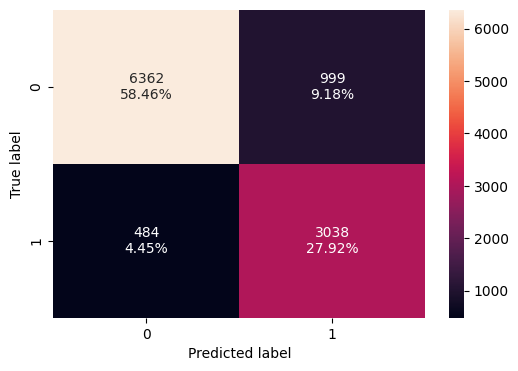

<IPython.core.display.Javascript object>

In [111]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [112]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

Accuracy  Recall  Precision      F1
0   0.86373 0.86258    0.75254 0.80381

<IPython.core.display.Javascript object>

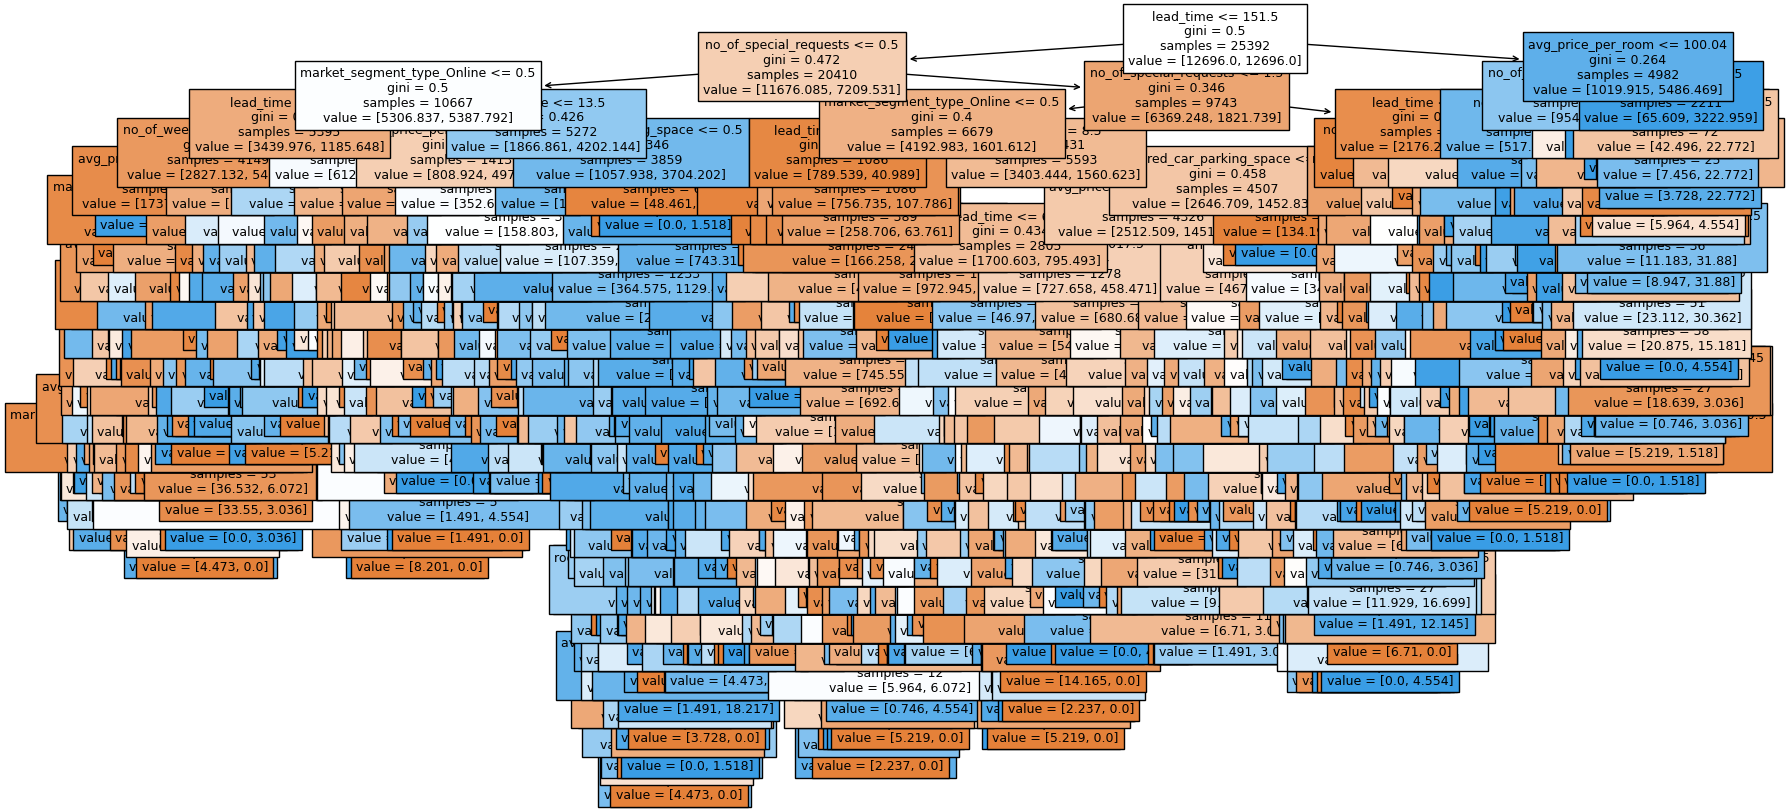

<IPython.core.display.Javascript object>

In [113]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [114]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

<IPython.core.display.Javascript object>

In [115]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

<IPython.core.display.Javascript object>

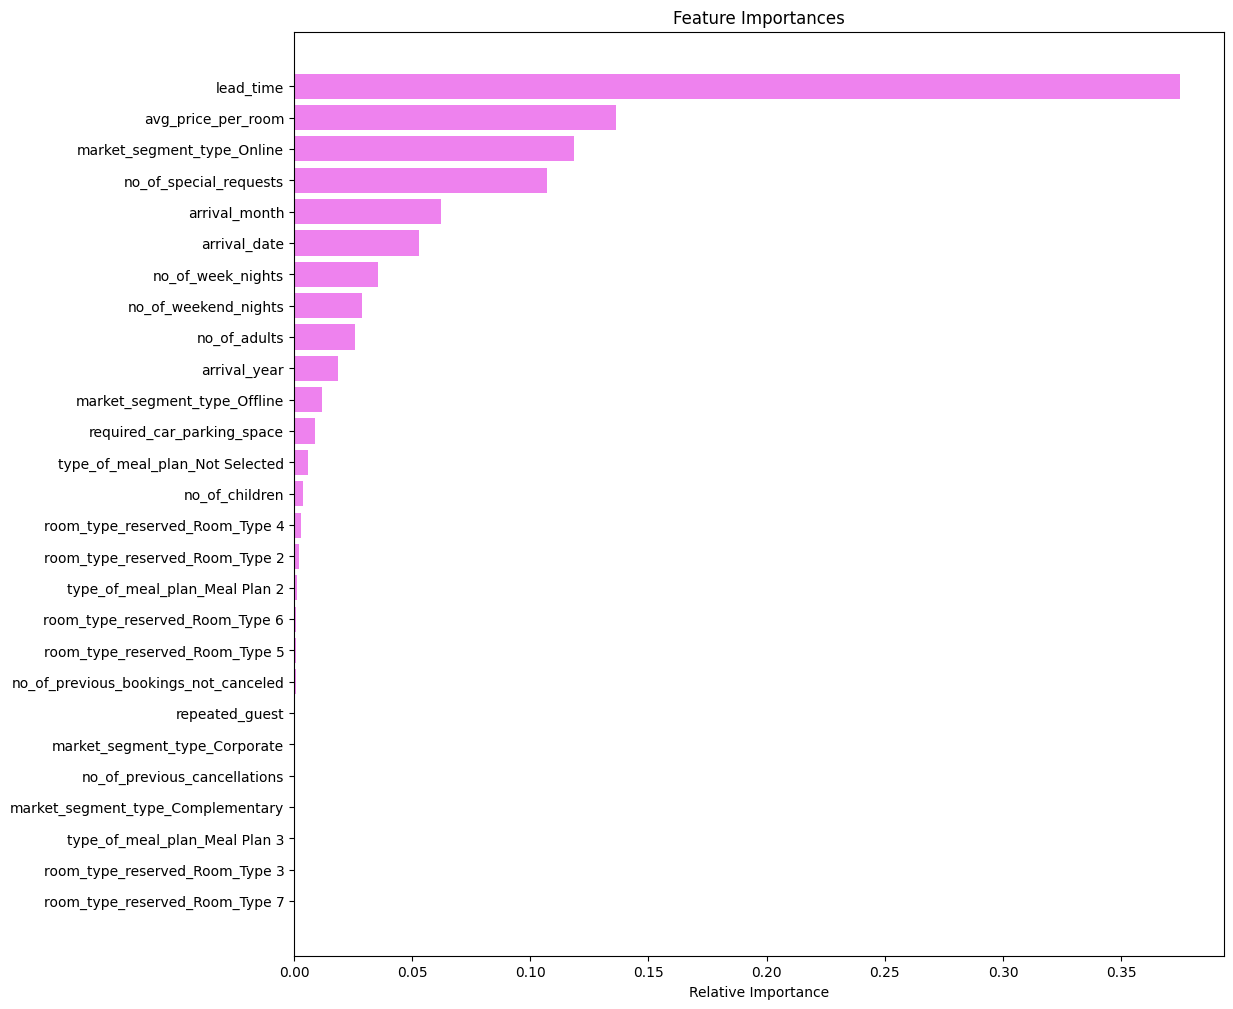

<IPython.core.display.Javascript object>

In [116]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Performance Comparison and Conclusions

In [117]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_without.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree without class_weight  \
Accuracy                              0.99421   
Recall                                0.98661   
Precision                             0.99578   
F1                                    0.99117   

           Decision Tree with class_weight  Decision Tree (Pre-Pruning)  \
Accuracy                           0.99311                      0.61854   
Recall                             0.99510                      0.85651   
Precision                          0.98415                      0.45773   
F1                                 0.98960                      0.59662   

           Decision Tree (Post-Pruning)  
Accuracy                        0.92698  
Recall                          0.95145  
Precision                       0.84604  
F1                              0.89566

<IPython.core.display.Javascript object>

In [118]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_without.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Decision Tree without class_weight  \
Accuracy                              0.87108   
Recall                                0.81034   
Precision                             0.79521   
F1                                    0.80270   

           Decision Tree with class_weight  Decision Tree (Pre-Pruning)  \
Accuracy                           0.86447                      0.61840   
Recall                             0.80608                      0.86229   
Precision                          0.78188                      0.45295   
F1                                 0.79379                      0.59392   

           Decision Tree (Post-Pruning)  
Accuracy                        0.86373  
Recall                          0.86258  
Precision                       0.75254  
F1                              0.80381

<IPython.core.display.Javascript object>

Model Comparison:

Decision Tree without class_weight and Decision Tree with class_weight show similar performance with very large overfitting for the training data.

Decision Tree (pre-pruning) doesn't perform very well on both training and test sets, but it does have very similar scores and is not overfit.

Decision Tree (Post-Pruning) performs well on both training and test sets, indicating a good balance between precision and recall.

In summary, the Decision Tree (Post-Pruning) model seems to be the most balanced and generalizable model among the options with acceptable perfrmance in terms of accuracy, although the model does overfit the training data.

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

The model built can be used to predict if a guest is going to cancel their booking with 86% accuracy.

lead time, average price per room, market segment, and number of special requests.

More datapoints for these bookings are needed to create a more reliable and accurate model. Some data points could include the method of online funnels that lead to the booking, as opposed to just an 'online' demographic label. Competitor pricing at time of bookings, method of booking payment, communication preferences for booking reminders, detailed guest demographics like age, and purpose of stay whether for business, leisure, etc.

It would be wise to take further detailed note of number of special requests and determine if these requests are things that should be standard procedure, since the guests with these requests were about 10% less likely to cancel than guests who did not make or get these special requests.

The number of repeated guests is very small at 2.6% of the data set, and these customers are very unlikely to cancel their bookings, so it would be wise to try and determine what leads guests to come back to the hotel and try to increase the number. Maybe email campaigns or text campaigns to previous guests would be a good avenue for this.